<a href="https://colab.research.google.com/github/pratikchaudhari64/notebooks/blob/main/pytorch_and_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [42]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


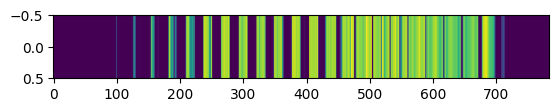

In [3]:
# Display the ith image out of minibatch
i = 1
plt.imshow(training_data.data[:i].view(i, 784), aspect = 100)
plt.show()
# training_data.data[:i].view(1, 784)

## Basic forward pass.
 - **Input Layer**: training data had original tensor of (3,28,28) where the 28x28 matrix for each photo already has RGB encoded numbers. Then, flattened it out for each image to have 28*28 features (kinda,..) and then input is tensor (3,784)
 - **Hidden Layers**: layer1+relu; layer2+relu
 - **Output Layers**: (3,10) form tensor gets created first by introducing new linear layer (512, 10). Then, perform softmax to scale such that sum = 1(form probabilities), then finally test probability of your desired class (10 total classes returned with probability for each) against what it actually was

In [49]:
minibatch_size = 32

train_minibatch = training_data.data[:minibatch_size]

flattened_view = train_minibatch.view(minibatch_size, 784).type(torch.float32)
print(f"final input: {flattened_view.size()}")                      # input photos get converted to numerical represenatation. One way to think
                                                                    # to think is that each image is now represented as 784 feature columns (size: 3x784)


layer1 = nn.Linear(in_features=28*28, out_features=512)
hidden1 = layer1(flattened_view)
hidden1_relu = nn.ReLU()(hidden1)
print(f"hidden1_relu: {hidden1_relu.size()}")                       # First mixing of weights along
                                                                    # with a ReLU (and oher things like batchnorm/dropouts etc.)

layer_2 = nn.Linear(512, 512)
hidden_2 = layer_2(hidden1_relu)
hidden_2_relu = nn.ReLU()(hidden_2)
print(f"hidden2_relu: {hidden_2_relu.size()}")                      # Second mixing of weights along
                                                                    # with a ReLU (and oher things like batchnorm/dropouts etc.)


layer_3 = nn.Linear(512, 10)
output = layer_3(hidden_2_relu)
print(f"output: {output.size()}")                                   # Finally converted to give pre-probabilities (think of these as counts)
                                                                    # for each class (which in turn we want to maximize)
loss = nn.functional.cross_entropy(output, training_data.targets[:minibatch_size])
print(loss)
loss.backward()

for layer in [layer1, layer_2, layer_3]:
  for p in layer.parameters():
    p.data = p.data - 0.01 * p.grad.data


# softmaxed probabilities
# softmax = nn.Softmax(dim=1)
# probabilities = softmax(output)
# print(f"probabilities: {probabilities.size()}")                     # counts found in previous example now got scaled to resemble probabilities
# probabilities[0]



final input: torch.Size([32, 784])
hidden1_relu: torch.Size([32, 512])
hidden2_relu: torch.Size([32, 512])
output: torch.Size([32, 10])
tensor(16.7956, grad_fn=<NllLossBackward0>)


In [42]:
# lay = nn.Linear(in_features=784, out_features=20)
# print(lay.weight.size())
# print(lay.bias.size())

for param in [layer1, layer_2, layer_3]:
    for p in param.parameters():
        print(p.data)

for i in layer1.parameters():
  print(i)

layer1.weight
# dir(probabilities)
# probabilities.grad
# loss = nn.functional.cross_entropy(output, training_data.targets[:3])
# loss

Parameter containing:
tensor([[-1.0868e-03,  2.6068e-02,  3.0116e-03,  ...,  2.3046e-02,
          3.0558e-02,  2.7585e-02],
        [ 2.1503e-02, -3.1856e-02,  3.2216e-02,  ...,  1.7353e-02,
          1.1927e-02, -1.0294e-02],
        [ 1.0987e-02, -9.9699e-03, -3.2709e-02,  ..., -2.7462e-02,
          1.2825e-02, -6.8808e-03],
        ...,
        [-1.8730e-02,  3.2761e-05, -3.4977e-02,  ..., -2.8589e-03,
          1.9963e-02,  2.8916e-02],
        [-9.3056e-03,  3.2783e-02,  4.4921e-03,  ..., -2.7229e-02,
          1.3071e-02, -2.8241e-04],
        [-3.4494e-02, -2.9606e-03,  2.2455e-04,  ..., -2.1973e-02,
         -2.3918e-02,  4.4296e-03]], requires_grad=True)
Parameter containing:
tensor([-8.2297e-03, -2.9221e-02, -1.5031e-02,  7.7767e-03,  1.4928e-03,
        -1.1382e-02, -2.2032e-02, -2.0942e-02, -1.3441e-02,  2.7542e-02,
        -1.9204e-02, -2.4747e-02, -1.9584e-02, -1.7675e-02,  3.3758e-02,
        -3.2228e-02, -5.0270e-03,  2.4905e-02,  2.9400e-03,  5.1760e-03,
        -2.0

Parameter containing:
tensor([[-1.0868e-03,  2.6068e-02,  3.0116e-03,  ...,  2.3046e-02,
          3.0558e-02,  2.7585e-02],
        [ 2.1503e-02, -3.1856e-02,  3.2216e-02,  ...,  1.7353e-02,
          1.1927e-02, -1.0294e-02],
        [ 1.0987e-02, -9.9699e-03, -3.2709e-02,  ..., -2.7462e-02,
          1.2825e-02, -6.8808e-03],
        ...,
        [-1.8730e-02,  3.2761e-05, -3.4977e-02,  ..., -2.8589e-03,
          1.9963e-02,  2.8916e-02],
        [-9.3056e-03,  3.2783e-02,  4.4921e-03,  ..., -2.7229e-02,
          1.3071e-02, -2.8241e-04],
        [-3.4494e-02, -2.9606e-03,  2.2455e-04,  ..., -2.1973e-02,
         -2.3918e-02,  4.4296e-03]], requires_grad=True)